# Lab 03 : Loss and error rate -- demo

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2026_codes/labs_lecture04/lab03_monitoring_loss'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')

### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=200

### Do 30 passes through the training set

In [7]:
for epoch in range(30):
    
    running_loss=0
    running_error=0
    num_batches=0
    
    shuffled_indices=torch.randperm(60000)
 
    for count in range(0, 60000, bs):
    
        optimizer.zero_grad()
        
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label= train_label[indices]

        inputs = minibatch_data.view(bs,784)

        inputs.requires_grad_()

        scores=net( inputs ) 

        loss =  criterion( scores , minibatch_label) 
        
        loss.backward()

        optimizer.step()
        
        
        # compute and accumulate stats
        
        running_loss += loss.detach().item()
               
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    
    print('epoch=',epoch, '\t loss=', total_loss , '\t error=', total_error*100 ,'percent')

epoch= 0 	 loss= 1.4625103358427685 	 error= 28.16500000158946 percent
epoch= 1 	 loss= 0.8544493289788564 	 error= 16.7599999109904 percent
epoch= 2 	 loss= 0.6865652740001679 	 error= 14.98499979575475 percent
epoch= 3 	 loss= 0.6053670463959376 	 error= 13.994999845822653 percent
epoch= 4 	 loss= 0.5560778040687243 	 error= 13.438333153724672 percent
epoch= 5 	 loss= 0.5223813235759736 	 error= 12.915000180403391 percent
epoch= 6 	 loss= 0.49756116151809693 	 error= 12.55166671673457 percent
epoch= 7 	 loss= 0.47838978240887325 	 error= 12.239999890327454 percent
epoch= 8 	 loss= 0.4630210487047831 	 error= 11.990000108877817 percent
epoch= 9 	 loss= 0.4502976710597674 	 error= 11.775000135103863 percent
epoch= 10 	 loss= 0.43957645187775296 	 error= 11.576666911443075 percent
epoch= 11 	 loss= 0.430414971212546 	 error= 11.388333578904469 percent
epoch= 12 	 loss= 0.4224283012747765 	 error= 11.21333372592926 percent
epoch= 13 	 loss= 0.4153972727060318 	 error= 11.091666758060455 

### Choose image at random from the test set and see how good/bad are the predictions

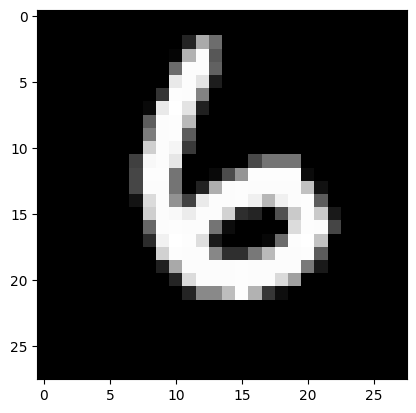

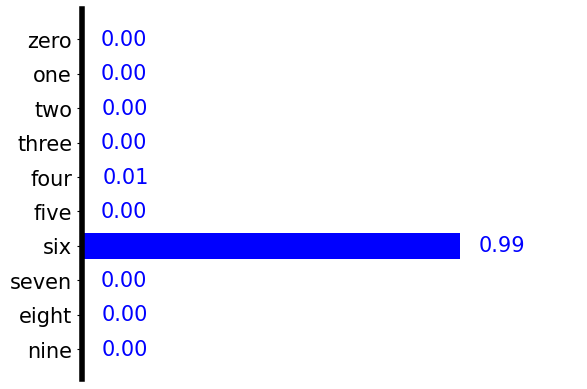

In [12]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_mnist(probs)